In [19]:
from os import getcwd
from os.path import abspath, join

import numpy as np
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

from src.data.load_dataset import load_mnist
from src.models.networks import V1_mnist_RFNet, classical_RFNet
from src.models.utils import train, test

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

In [11]:
# load data
train_batch_size, train_percentage = 256, 0.99
train_loader, val_loader, test_loader = load_mnist(train_batch_size, train_percentage)

### V1 RFNet with $s=5.2$, $f=2.1$

In [ ]:
num_neurons = sorted(set(np.logspace(0, 3.4, 50).astype('int')))
s, f, c = 5.2, 2.1, None
lr = 0.01
num_epochs = 10
log_interval = 100

test_v1 = {'hidden_size': [], 'mean': [], 'std': []}
for hidden_size in tqdm(num_neurons):
    accuracy = []
    for trial in range(1):
        model = V1_mnist_RFNet(hidden_size, s, f, c).to(device)
        optimizer = optim.SGD(model.parameters(), lr=lr)

        for epoch in range(num_epochs):
            _ = train(log_interval, device, model, train_loader, optimizer, epoch, verbose=False)
        accuracy.append(test(model, device, test_loader, verbose=False))
        
    test_v1['hidden_size'].append(hidden_size)
    test_v1['mean'].append(np.mean(accuracy))
    test_v1['std'].append(np.std(accuracy))

 24%|██▍       | 10/42 [10:03<32:05, 60.18s/it]

### Classical RFNet

In [ ]:
num_neurons = sorted(set(np.logspace(0, 3.4, 50).astype('int')))
inp_size = (1, 28, 28)
lr = 0.01
num_epochs = 10
log_interval = 100

test_classical = {'hidden_size': [], 'mean': [], 'std': []} 
for hidden_size in tqdm(num_neurons):
    accuracy = []
    for trial in range(1):
        model = classical_RFNet(inp_size, hidden_size).to(device)
        optimizer = optim.SGD(model.parameters(), lr=lr)

        for epoch in range(num_epochs):
            _ = train(log_interval, device, model, train_loader, optimizer, epoch, verbose=False)
        accuracy.append(test(model, device, test_loader, verbose=False))

    test_classical['hidden_size'].append(hidden_size)
    test_classical['mean'].append(np.mean(accuracy))
    test_classical['std'].append(np.std(accuracy))

### V1 RFNet with incompatible parameters $s=0.5$, $f=0.5$

In [ ]:
num_neurons = sorted(set(np.logspace(0, 3.4, 50).astype('int')))
s, f, c = 0.5, 0.5, None
lr = 0.01
num_epochs = 10
log_interval = 100

test_incompatible = {'hidden_size': [], 'mean': [], 'std': []}
for hidden_size in tqdm(num_neurons):
    accuracy = []
    for trial in range(1):
        model = V1_mnist_RFNet(hidden_size, s, f, c).to(device)
        optimizer = optim.SGD(model.parameters(), lr=lr)

        for epoch in range(num_epochs):
            _ = train(log_interval, device, model, train_loader, optimizer, epoch, verbose=False)
        accuracy.append(test(model, device, test_loader, verbose=False))
        
    test_incompatible['hidden_size'].append(hidden_size)
    test_incompatible['mean'].append(np.mean(accuracy))
    test_incompatible['std'].append(np.std(accuracy))

  9%|▉         | 4/43 [03:53<37:58, 58.43s/it]

In [31]:
# save
test = {'v1': test_v1, 'classical': test_classical, 'incompatible': test_incompatible}
data_dir = abspath(join(getcwd(), '../../'))
with open(data_dir + '/models/results/mnist_clf/mnist_clf_s=%0.2f_f=%0.2f.pickle' % (s, f), 'wb') as handle:
    pickle.dump(test, handle, protocol=pickle.HIGHEST_PROTOCOL) 

(0.0, 1000.0)

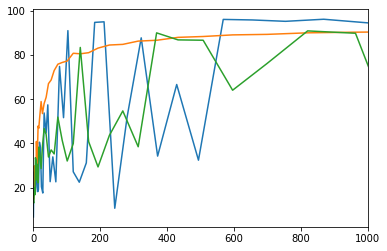

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(test_v1['hidden_size'], test_v1['mean'])
plt.plot(test_classical['hidden_size'], test_classical['mean'])
plt.plot(test_incompatible['hidden_size'], test_incompatible['mean'])
plt.xlim([0, 1000])

In [47]:
list(zip(test_v1['hidden_size'], test_v1['mean']))

[(1, 6.71),
 (2, 20.3),
 (3, 18.87),
 (4, 27.17),
 (5, 22.33),
 (6, 18.58),
 (7, 17.97),
 (8, 20.08),
 (9, 30.54),
 (10, 22.68),
 (12, 23.35),
 (14, 18.13),
 (16, 19.15),
 (19, 40.48),
 (22, 37.95),
 (25, 20.33),
 (29, 17.51),
 (33, 53.7),
 (39, 44.65),
 (44, 57.36),
 (51, 22.64),
 (59, 33.85),
 (68, 22.57),
 (79, 74.72),
 (91, 51.58),
 (104, 90.91),
 (120, 27.11),
 (138, 22.4),
 (159, 31.13),
 (184, 94.64),
 (212, 94.9),
 (244, 10.63),
 (281, 51.99),
 (323, 87.65),
 (372, 34.2),
 (429, 66.56),
 (494, 32.36),
 (568, 95.98),
 (655, 95.74),
 (754, 95.12),
 (868, 96.06),
 (1000, 94.42)]